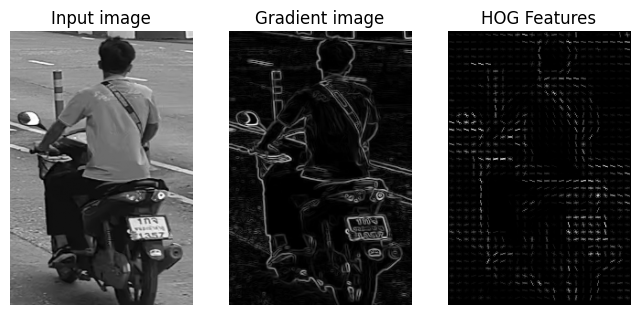

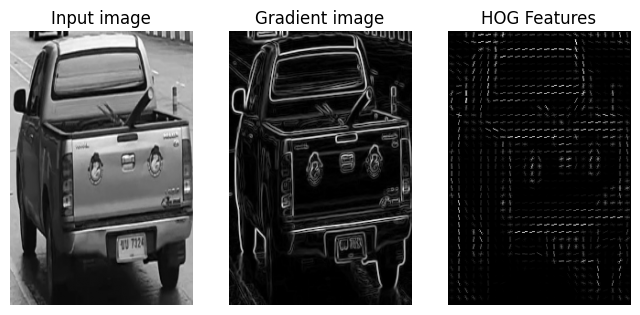

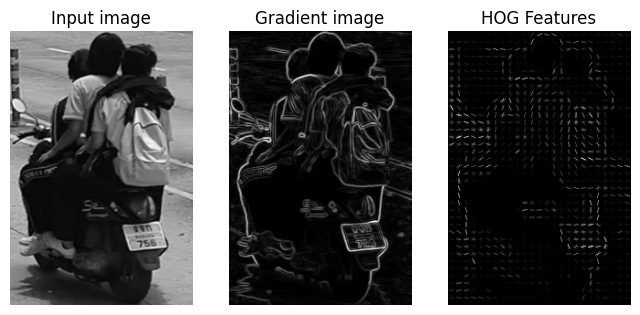

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage.filters import sobel_h, sobel_v
from skimage import transform
from PIL import Image



image_urls = [
    "../data/vehicle-type-detecion/motorcycle/PIC_0.jpg",
    "../data/vehicle-type-detecion/pickup/PIC_0.jpg",
    "../data/vehicle-type-detecion/motorcycle/PIC_125.jpg",
]

for image_url in image_urls:
    image = np.array(Image.open(image_url).convert('L'))

    image = transform.resize(image, (300, 200))
    # image = util.img_as_float(image)

    # horizontal and vertical gradients
    gx = sobel_h(image)
    gy = sobel_v(image)

    # gradient magnitude
    grad_mag = np.hypot(gx, gy)

    fd, hog_image = hog(
        image,
        orientations=8,
        pixels_per_cell=(8, 8),
        cells_per_block=(1, 1),
        visualize=True,
    )

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    ax2.imshow(grad_mag, cmap='gray')
    ax2.set_title('Gradient image')
    ax2.axis('off')

    ax3.axis('off')
    ax3.imshow(hog_image, cmap=plt.cm.gray)
    ax3.set_title('HOG Features')
    plt.show()
    

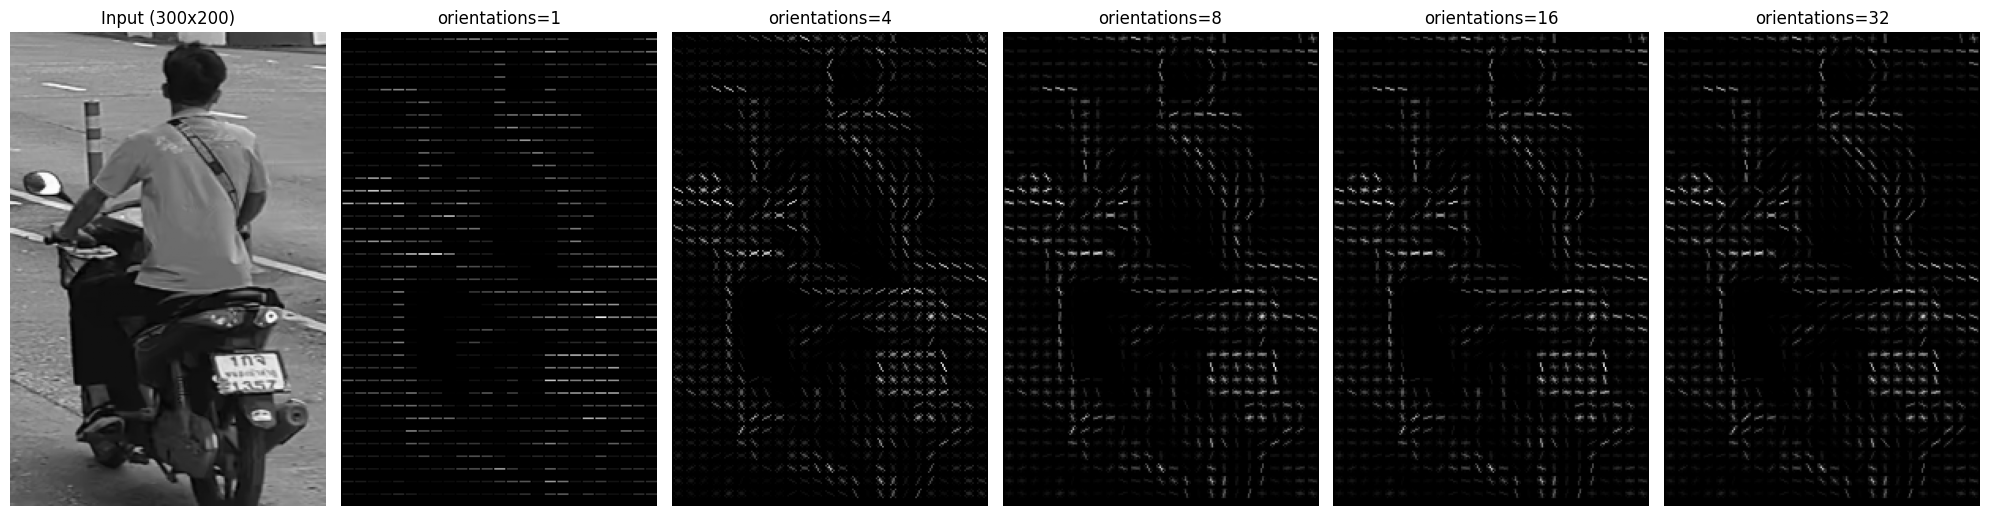

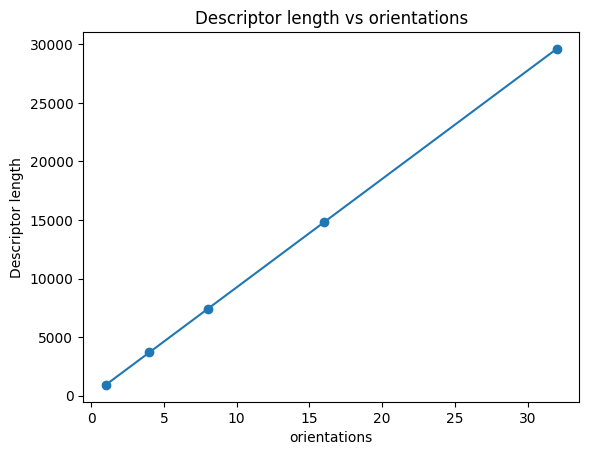

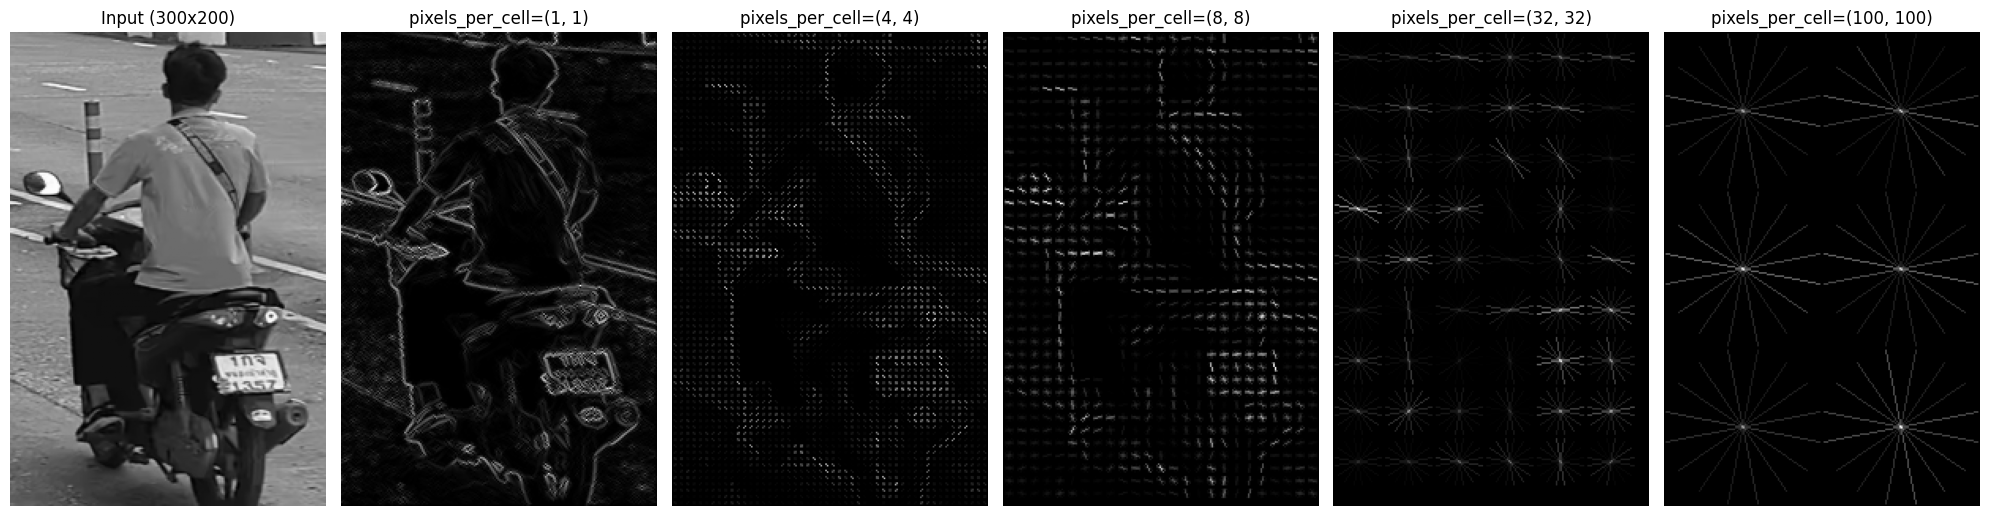

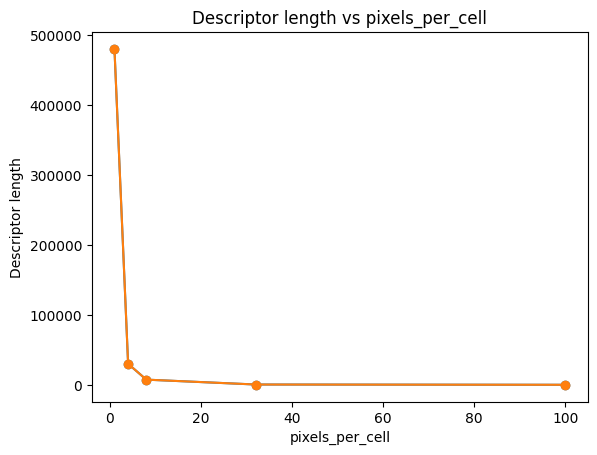

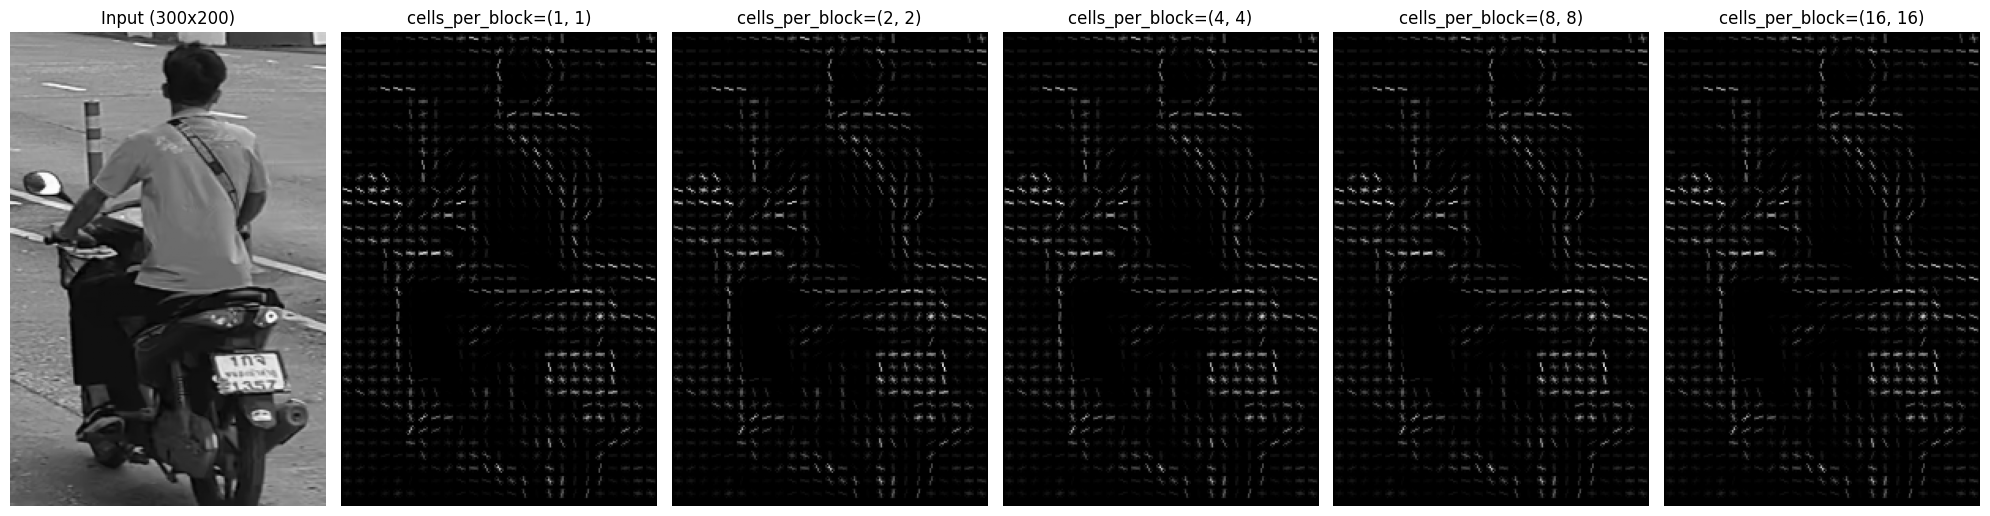

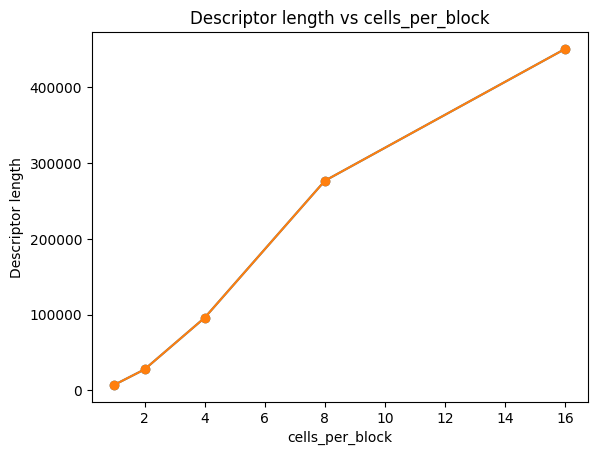

In [44]:
# VISUAL + DESCRIPTOR LENGTH PARAM COMPARISON

params = {
    "orientations": [1, 4, 8, 16, 32],
    "pixels_per_cell": [(1, 1), (4, 4), (8, 8), (32, 32), (100, 100)],
    "cells_per_block": [(1, 1), (2, 2), (4, 4), (8, 8), (16, 16)],
}

image = np.array(Image.open(image_urls[0]).convert('L'))
image = transform.resize(image, (300, 200))

for name, values in params.items():
    fig, axes = plt.subplots(1, len(values) + 1, figsize=(20, 10))
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Input (300x200)')

    desc_lengths = []
    fds = []

    for i, v in enumerate(values):
        kwargs = dict(orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1))
        kwargs[name] = v

        fd, hog_image = hog(image, visualize=True, **kwargs)
        desc_lengths.append(len(fd))
        fds.append(fd)

        axes[i + 1].imshow(hog_image, cmap='gray')
        axes[i + 1].axis('off')
        axes[i + 1].set_title(f'{name}={v}')

    plt.tight_layout()
    plt.show()

    # Descriptor length comparison
    plt.figure()
    plt.plot(values, desc_lengths, marker='o')
    plt.title(f'Descriptor length vs {name}')
    plt.xlabel(name)
    plt.ylabel('Descriptor length')
    plt.show()
